<IPython.core.display.Javascript object>


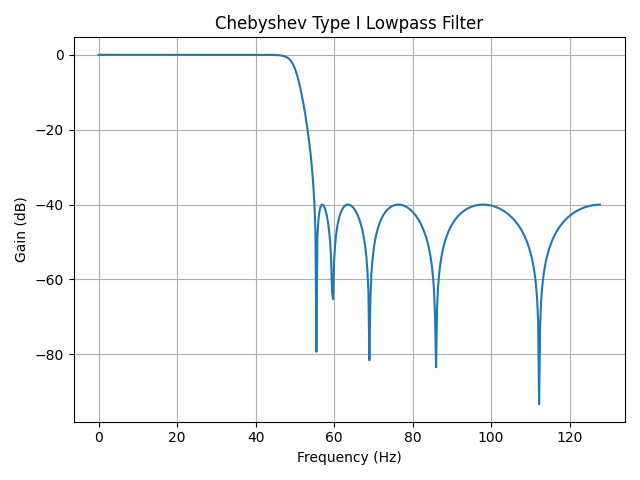

In [24]:
from scipy import signal
from scipy.signal import butter, lfilter, freqz
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

Fs = 256			# sampling rate
Fn = Fs / 2			# Nyquist frequency
f_low = 55 / Fn 	# normalized freq for lowpass filter

# Chebyshev II order 10 lowpass filter
b, a = signal.cheby2(10,40,f_low)
# b, a = signal.cheby1(10,8,f_low)
w, h = signal.freqz(b, a)

plt.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.grid()
plt.title("Chebyshev Type I Lowpass Filter")
plt.tight_layout()

plt.show()



In [2]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

<IPython.core.display.Javascript object>


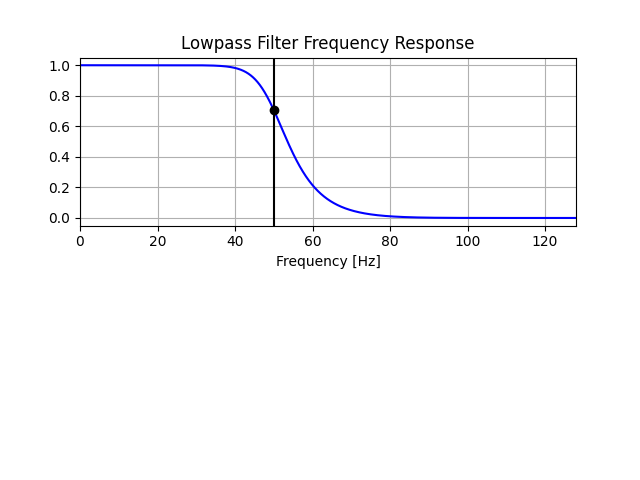

In [3]:
# Filter requirements.
order = 6
fs = 256.0       # sample rate, Hz
cutoff = 50  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = signal.freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

<IPython.core.display.Javascript object>


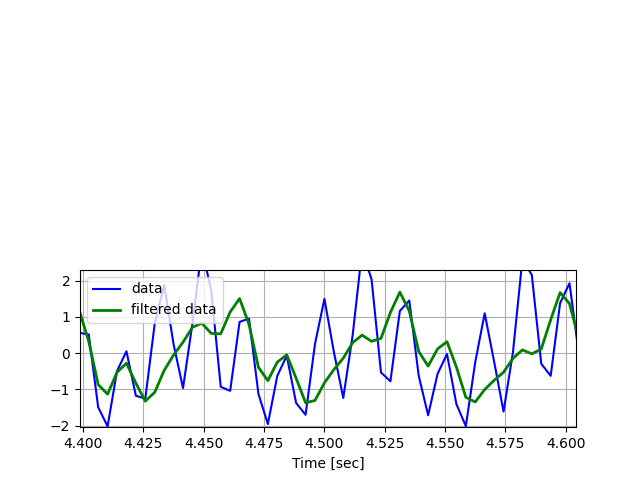

In [5]:
# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(14*2*np.pi*t) + 1.5*np.cos(60*2*np.pi*t) + 0.5*np.sin(45.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()